<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw3/hw3q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading data

I have run the model with learning rate 0.00005 and I could achieve a maximum validation accuracy of 90.70%, after running for 100 epochs. After fine tuning the model, and running with a learning rate of 0.00002, I could achieve a maximum accuracy of 94.20%. With learning rate of 0.00001 after fine tuning, I could achieve a maximum accuracy fo 95.40%.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-16 03:17:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  79.0MB/s    in 0.8s    

2019-04-16 03:17:17 (79.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extracting images and splitting data into training and test data sets

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Building the model with VGG19 convolutional base

#### Loading VGG19 convolutional base and freezing it

In [4]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = False

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 5s 0us/step


#### Adding densely connected layers to the convolutional base

In [5]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# no dropout
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


### Training the model

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=0.00005), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 23s 230ms/step - loss: 0.5003 - acc: 0.7575 - val_loss: 0.3935 - val_acc: 0.8130
Epoch 2/100
100/100 [==============================] - 18s 177ms/step - loss: 0.3867 - acc: 0.8220 - val_loss: 0.3868 - val_acc: 0.8130
Epoch 3/100
100/100 [==============================] - 18s 178ms/step - loss: 0.3491 - acc: 0.8495 - val_loss: 0.3701 - val_acc: 0.8370
Epoch 4/100
100/100 [==============================] - 19s 186ms/step - loss: 0.3207 - acc: 0.8640 - val_loss: 0.2842 - val_acc: 0.8850
Epoch 5/100
100/100 [==============================] - 18s 179ms/step - loss: 0.2963 - acc: 0.8785 - val_loss: 0.2717 - val_acc: 0.8790
Epoch 6/100
100/100 [==============================] - 19s 192ms/step - loss: 0.2971 - acc: 0.8710 - val_loss: 0.2877 - val_acc: 0.8770
Epoch 7/100
100/100 [==============================]

### Displaying loss and accuracy during training

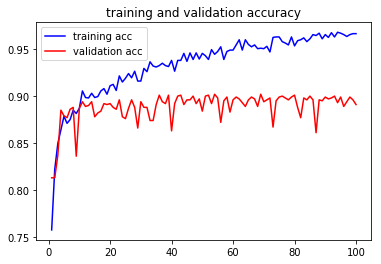

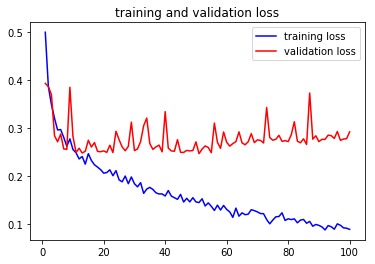

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Fine Tuning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

### Training model with fine tuning

In [9]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 204ms/step - loss: 0.1193 - acc: 0.9555 - val_loss: 0.3418 - val_acc: 0.8880
Epoch 2/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0962 - acc: 0.9635 - val_loss: 0.3187 - val_acc: 0.8990
Epoch 3/100
100/100 [==============================] - 19s 194ms/step - loss: 0.0781 - acc: 0.9720 - val_loss: 0.2486 - val_acc: 0.9190
Epoch 4/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0729 - acc: 0.9705 - val_loss: 0.2691 - val_acc: 0.9140
Epoch 5/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0562 - acc: 0.9780 - val_loss: 0.2701 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0535 - acc: 0.9810 - val_loss: 0.3597 - val_acc: 0.8980
Epoch 7/100
100/100 [==============================] - 18s 185ms/step - loss: 0.0408 - acc: 0.9865 - val_loss: 0.2722 - val_acc: 0.9140
Epoch 8/100
100/100 [===========================

### Displaying training and validation curves with fine tuning

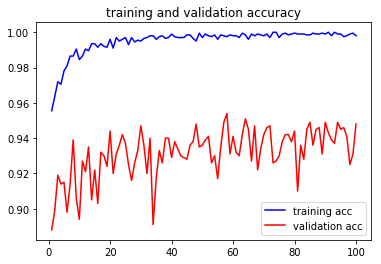

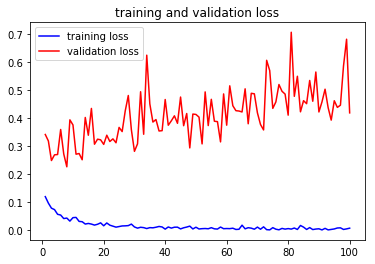

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Evaluating on the Validation dataset

In [11]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.5511307896525386
Validation accuracy: 0.941999990940094


### Saving the model

In [0]:
model_fname = 'cats_and_dogs_small_4.h5' 
model.save(model_fname)